# Lisbon Rebuilt - Notebook 1

### A. First dataset: Collectivities

In this section, we import a dataset containing a list of Collectivities in Lisbon Municipality, with the corresponding Foundation Date and Parish to which it belongs. With this information, we draw two plots: 1 - the number of Collectivities per Parish and 2 - the number of Collectivities per Foundation Date.

In [1]:
import pandas as pd

Importing the dataset to a `pandas` dataframe:

In [2]:
# dfc: dataframe collectivities
dfc = pd.read_csv('colectividades.csv')
dfc.head()

,NRASS.,Nome,FUNDACAO,FREGUESIA
0,1,ACADEMIA RECREIO ARTISTICO,15-08-1855,Santa Maria Maior
1,3,GRUPO DRAMÁTICO E ESCOLAR OS COMBATENTES,30-09-1906,Estrela
2,4,SOCIEDADE FILARMONICA ALUNOS ESPERANÇA,21-04-1850,Alcântra
3,5,GINASIO DO ALTO DO PINA,11-09-1911,Penha de França
4,6,ACADEMIA DE SANTO AMARO,10-03-1946,Alcântra


In [3]:
dfc.drop(['NRASS.'], axis=1, inplace=True)
dfc.rename(columns={' Nome':'Collectivity',' FUNDACAO':'Foundation',' FREGUESIA':'Parish'},\
           inplace=True)
dfc.head()

,Collectivity,Foundation,Parish
0,ACADEMIA RECREIO ARTISTICO,15-08-1855,Santa Maria Maior
1,GRUPO DRAMÁTICO E ESCOLAR OS COMBATENTES,30-09-1906,Estrela
2,SOCIEDADE FILARMONICA ALUNOS ESPERANÇA,21-04-1850,Alcântra
3,GINASIO DO ALTO DO PINA,11-09-1911,Penha de França
4,ACADEMIA DE SANTO AMARO,10-03-1946,Alcântra


In [4]:
#dfc.describe(include="all")
dfc.describe()

,Collectivity,Foundation,Parish
count,273,273,265
unique,273,270,24
top,CASA DA COMARCA DA SERTA,01-05-1932,Santa Maria Maior
freq,1,2,21


We see that not all colectivities have an atrributed parish. We discard them for simplicity.

In [5]:
dfc=dfc.dropna(subset=['Parish'],axis=0)
dfc.describe(include="all")

,Collectivity,Foundation,Parish
count,265,265,265
unique,265,262,24
top,CASA DA COMARCA DA SERTA,01-05-1932,Santa Maria Maior
freq,1,2,21


Now we count the number of collectivities per parish:

In [6]:
# dfcc: dataframe collectivities count
dfcc=dfc['Parish'].value_counts().to_frame()
dfcc.head()

,Parish
Santa Maria Maior,21
Arroios,19
Marvila,18
São Vicente,17
Ajuda,14


In [7]:
dfcc.reset_index(drop=False,inplace=True)
dfcc.rename(columns={'index':'Parish','Parish':'Count'},inplace=True)
dfcc.head()

,Parish,Count
0,Santa Maria Maior,21
1,Arroios,19
2,Marvila,18
3,São Vicente,17
4,Ajuda,14


The dataframe `dfcc` is already sorted, therefore it is ready for plotting:

In [8]:
import matplotlib.pyplot as plt

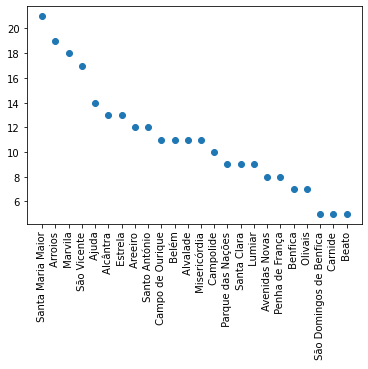

In [9]:
parish=dfcc['Parish']
count=dfcc['Count']
plt.scatter(parish,count)
plt.xticks(rotation = 90,size=10)
plt.show()

Let us try a different look:

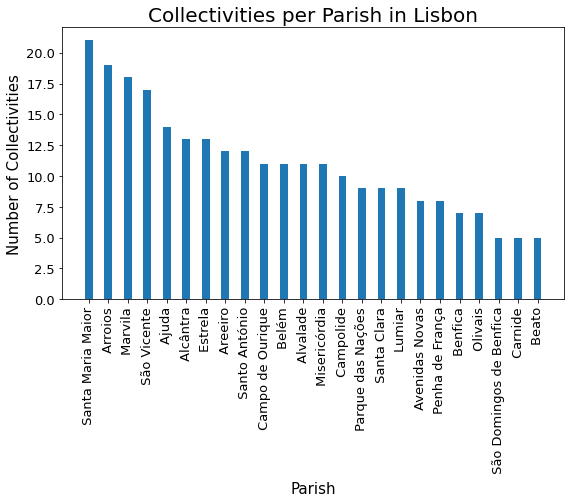

In [10]:
plt.figure(figsize=(9, 5))
plt.title('Collectivities per Parish in Lisbon',fontsize=20)
plt.ylabel('Number of Collectivities', fontsize=15)
plt.xlabel('Parish',fontsize=15)
plt.xticks(rotation = 90,size=10,fontsize=13)
plt.yticks(fontsize=13)
plt.bar(parish,count, width=0.4)
plt.savefig('coll_parish.pdf',bbox_inches="tight")
#plt.show()

Now we wish to plot the number of Collectivities per foundation year. For this we need to extract the year information from the dataset `dfc`.

In [11]:
import datetime

In [12]:
# verification of the datatype of the column 'Foundation'
print(dfc['Foundation'].dtype)
# conversion of the object type to a datetime type, in the corresponding format
dfc['Foundation']=pd.to_datetime(dfc['Foundation'],format=' %d-%m-%Y')
# verification of the new type for the column 'Foundation'
print(dfc['Foundation'].dtype)
# extraction of the year information and addition of a new column to the dataframe
dfc['Year']=dfc['Foundation'].dt.year
dfc.head()

object
datetime64[ns]


,Collectivity,Foundation,Parish,Year
0,ACADEMIA RECREIO ARTISTICO,1855-08-15,Santa Maria Maior,1855
1,GRUPO DRAMÁTICO E ESCOLAR OS COMBATENTES,1906-09-30,Estrela,1906
2,SOCIEDADE FILARMONICA ALUNOS ESPERANÇA,1850-04-21,Alcântra,1850
3,GINASIO DO ALTO DO PINA,1911-09-11,Penha de França,1911
4,ACADEMIA DE SANTO AMARO,1946-03-10,Alcântra,1946


In [13]:
# dfccd: dataframe collectivity counts per year
dfccy=dfc['Year'].value_counts().to_frame()
dfccy.head()

,Year
1975,7
1934,6
1935,6
1939,6
1920,5


In [14]:
dfccy.reset_index(drop=False,inplace=True)
dfccy.rename(columns={'index':'Year','Year':'Count'},inplace=True)
dfccy.head()

,Year,Count
0,1975,7
1,1934,6
2,1935,6
3,1939,6
4,1920,5


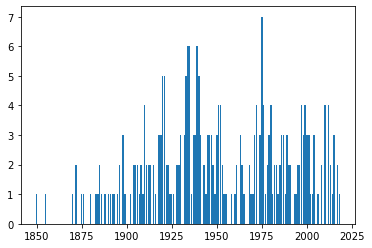

In [15]:
year=dfccy['Year']
county=dfccy['Count']
plt.bar(year,county)
plt.show()

There are too many bins in the above plot that add confusion to our purpose, therefore we group the years by decades.

In [16]:
# calculation the numbers of groups - which will not be necessary
(2020-1850)/10

17.0

In [17]:
# dfccd: dataset collectivities count per decade
# extracting the integer part of the year divided by 10 and then multiplying by 10
# thereafter, summing the numbers of foundations per decade
dfccd=dfccy.groupby((dfccy.Year//10)*10).sum()
dfccd.head()

,Year,Count
Year,,
1850,3705,2
1870,7493,5
1880,11306,7
1890,15154,11
1900,13341,11


In [18]:
dfccd.drop(['Year'], axis=1, inplace=True)
dfccd.head()

,Count
Year,
1850,2
1870,5
1880,7
1890,11
1900,11


In [19]:
dfccd.columns

Index(['Count'], dtype='object')

In [20]:
dfccd.reset_index(drop=False,inplace=True)
dfccd.head()

,Year,Count
0,1850,2
1,1870,5
2,1880,7
3,1890,11
4,1900,11


In [21]:
dfccd.rename(columns={'Year':'Decade'},inplace=True)
dfccd.head()

,Decade,Count
0,1850,2
1,1870,5
2,1880,7
3,1890,11
4,1900,11


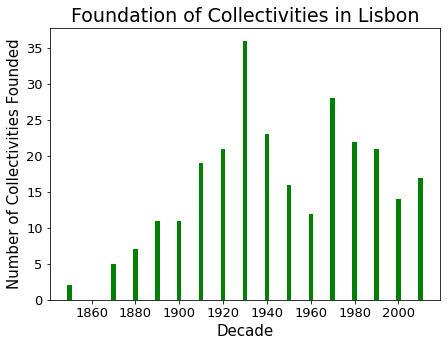

In [22]:
%matplotlib inline 
decade=dfccd['Decade']
countd=dfccd['Count']

plt.figure(figsize=(7, 5))
plt.title('Foundation of Collectivities in Lisbon',fontsize=19)
plt.ylabel('Number of Collectivities Founded', fontsize=15)
plt.xlabel('Decade',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.bar(decade,countd, width=2,color='g')
plt.savefig('col_fdecade.pdf',bbox_inches='tight')

### B. Second Dataset: Parishes

In this section, we import a dataframe containing information on the Parishes in Lisbon Municipality, namely the number of Inhabitants and Area of each Parish, and the geographic coordinates of the Parish Council. The aim of this section is three-fold: 1) To prepare a dataset to be used in a different notebook for the Venues; 2) To draw a plot with the number of Inhabitants per Parish; 3) To draw a correlation plot between the number of Collectivities and the number of Inhabitants in each Parish.

In [23]:
# dfp: dataset parishes
dfp=pd.DataFrame()
dfp = pd.read_csv('freguesias.csv')
dfp.head()

,Number,Freguesia,Population 2013,Area km2,Lat_JF,Long_JF
0,1,Ajuda,15617,2.88,38° 42' 20.81'',9° 12' 4.77''
1,2,Alcântra,13943,5.07,38° 42' 17.44'',9° 10' 47.56''
2,3,Alvalade,31813,5.34,38° 44' 48.89'',9° 8' 25.93''
3,4,Areeiro,20131,1.74,38° 44' 42.43'',9° 8' 33.55''
4,5,Arroios,31653,2.13,38° 43' 15.63'',9° 8' 4.77''


In [24]:
dfp.columns

Index(['Number', ' Freguesia', ' Population 2013', ' Area km2', ' Lat_JF',
       ' Long_JF'],
      dtype='object')

In [25]:
#dfp.drop(['Number'], axis=1, inplace=True)
dfp.rename(columns={' Freguesia':'Parish',' Population 2013':'Population 2013',\
    ' Area km2':'Area km^2',' Lat_JF':'Lat',' Long_JF':'Long'},inplace=True)
dfp.head()

,Number,Parish,Population 2013,Area km^2,Lat,Long
0,1,Ajuda,15617,2.88,38° 42' 20.81'',9° 12' 4.77''
1,2,Alcântra,13943,5.07,38° 42' 17.44'',9° 10' 47.56''
2,3,Alvalade,31813,5.34,38° 44' 48.89'',9° 8' 25.93''
3,4,Areeiro,20131,1.74,38° 44' 42.43'',9° 8' 33.55''
4,5,Arroios,31653,2.13,38° 43' 15.63'',9° 8' 4.77''


In [26]:
dfp.describe()

,Number,Population 2013,Area km^2
count,24.000000,24.000000,24.000000
mean,12.500000,23029.166667,4.168333
std,7.071068,9519.088350,2.400032
min,1.000000,11836.000000,1.490000
25%,6.750000,15429.750000,2.392500
50%,12.500000,20578.000000,3.185000
75%,18.250000,31693.000000,5.365000
max,24.000000,45605.000000,10.430000


In [27]:
# dfpsp: dataframe parishes sorted by population
dfpsp=dfp.sort_values(['Population 2013'],ascending=False)
dfpsp.head()

,Number,Parish,Population 2013,Area km^2,Lat,Long
13,14,Lumiar,45605,6.57,38° 46' 3.79'',9° 9' 36.66''
14,15,Marvila,37793,7.12,38° 44' 48.74'',9° 6' 37.29''
8,9,Benfica,36985,8.03,38° 44' 54.14'',9° 11' 58.67''
16,17,Olivais,33788,8.09,38° 46' 24.92'',9° 7' 1.41''
22,23,São Domingos de Benfica,33043,4.29,38° 44' 44.89'',9° 11' 23.32''


Now the geographical coordinates in the above dataframe are given in minutes and seconds, whereas we need then in decimal degree format.

In [28]:
# first, the coordinate columns are converted to string type
lat=dfp['Lat'].astype('str')
long=dfp['Long'].astype('str')

# then the loop goes through the whole string containing the coordinate information,
# where it finds whole sequences of number characters, it converts them to float type
# thereafter, the conversion of minutes and seconds to decimal degrees is carried out
i=0
for row in lat:
        deg=float(row[:row.find('°')])
        minutes=float(row[(row.find('°')+1):(row.find('\''))])
        seconds=float(row[(row.find('\'')+1):(row.find('\'\''))])
        ddeg=deg+minutes/60.+seconds/3600.
#        print(i,decimaldeg)
        lat.iloc[i]=ddeg
        i=i+1
        
i=0
for row in long:
    deg=float(row[:row.find('°')])
    minutes=float(row[(row.find('°')+1):(row.find('\''))])
    seconds=float(row[(row.find('\'')+1):(row.find('\'\''))])
    ddeg=deg+minutes/60.+seconds/3600.
    long.iloc[i]=-ddeg
    i=i+1

In [29]:
dfp['Latitude']=lat
dfp['Longitude']=long
dfp.head()

,Number,Parish,Population 2013,Area km^2,Lat,Long,Latitude,Longitude
0,1,Ajuda,15617,2.88,38° 42' 20.81'',9° 12' 4.77'',38.7058,-9.20132
1,2,Alcântra,13943,5.07,38° 42' 17.44'',9° 10' 47.56'',38.7048,-9.17988
2,3,Alvalade,31813,5.34,38° 44' 48.89'',9° 8' 25.93'',38.7469,-9.14054
3,4,Areeiro,20131,1.74,38° 44' 42.43'',9° 8' 33.55'',38.7451,-9.14265
4,5,Arroios,31653,2.13,38° 43' 15.63'',9° 8' 4.77'',38.721,-9.13466


In [30]:
dfp.drop(['Lat','Long'], axis=1, inplace=True)
dfp.head()

,Number,Parish,Population 2013,Area km^2,Latitude,Longitude
0,1,Ajuda,15617,2.88,38.7058,-9.20132
1,2,Alcântra,13943,5.07,38.7048,-9.17988
2,3,Alvalade,31813,5.34,38.7469,-9.14054
3,4,Areeiro,20131,1.74,38.7451,-9.14265
4,5,Arroios,31653,2.13,38.721,-9.13466


We save the dataframe `dfp` to a new dataset that we can use somewhere else.

In [31]:
dfp.to_csv('parishcoord.csv')

Our next goal is to plot the number of Inhabitants per Parish. Since we are not interested in the coordinates here, we resume to our dataframe `dfpsp` with the parishes sorted by population.

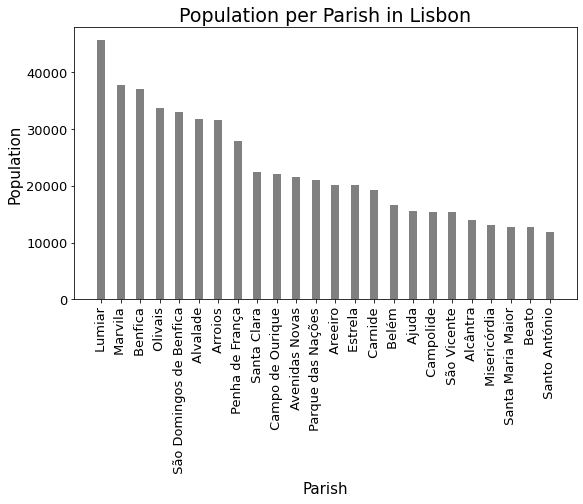

In [32]:
parish=dfpsp['Parish']
population=dfpsp['Population 2013']

plt.figure(figsize=(9, 5))
plt.title('Population per Parish in Lisbon',fontsize=19)
plt.ylabel('Population', fontsize=15)
plt.xlabel('Parish',fontsize=15)
plt.bar(parish,population,width=0.4,color='gray')
plt.xticks(rotation = 90,fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('pop_parish.pdf',bbox_inches='tight')

Finally, in order to find out if there is some correlation between the number of Collectivities and the number of Inhabitants per Parish, we start by merging the dataframes `dfcc` and `dfpsp` defined above.

In [33]:
# dfm: dataframe merging
dfm=pd.merge(left=dfcc, right=dfpsp, left_on='Parish', right_on='Parish')
dfm.head()

,Parish,Count,Number,Population 2013,Area km^2,Lat,Long
0,Santa Maria Maior,21,21,12822,3.01,38° 42' 41.10'',9° 8' 16.83''
1,Arroios,19,5,31653,2.13,38° 43' 15.63'',9° 8' 4.77''
2,Marvila,18,15,37793,7.12,38° 44' 48.74'',9° 6' 37.29''
3,São Vicente,17,24,15339,1.99,38° 43' 11.55'',9° 7' 54.66''
4,Ajuda,14,1,15617,2.88,38° 42' 20.81'',9° 12' 4.77''


In [34]:
dfm['Pop Density']=dfm['Population 2013']/dfm['Area km^2']
dfm.head()

,Parish,Count,Number,Population 2013,Area km^2,Lat,Long,Pop Density
0,Santa Maria Maior,21,21,12822,3.01,38° 42' 41.10'',9° 8' 16.83'',4259.800664
1,Arroios,19,5,31653,2.13,38° 43' 15.63'',9° 8' 4.77'',14860.563380
2,Marvila,18,15,37793,7.12,38° 44' 48.74'',9° 6' 37.29'',5308.005618
3,São Vicente,17,24,15339,1.99,38° 43' 11.55'',9° 7' 54.66'',7708.040201
4,Ajuda,14,1,15617,2.88,38° 42' 20.81'',9° 12' 4.77'',5422.569444


In [35]:
import seaborn as sns

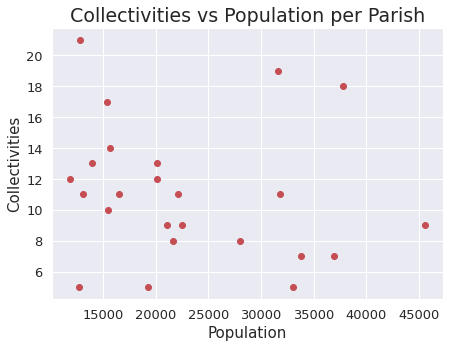

In [36]:
sns.set(rc={'figure.figsize':(7,5)})
#sns.regplot(x='Population 2013',y='Count',data=dfm)
parish=dfm['Population 2013']
population=dfm['Count']
plt.scatter(parish,population,color='r')
plt.title('Collectivities vs Population per Parish',fontsize=19)
plt.xlabel('Population', fontsize=15)
plt.ylabel('Collectivities',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('corr_pop_coll.pdf',bbox_inches='tight')

Finally, we compute the Pearson Correlation between the two variables:

In [37]:
from scipy import stats

In [38]:
pearson_coef,p_value=stats.pearsonr(dfm['Population 2013'],dfm['Count'])
print('Pearson Coefficient:',pearson_coef)
print('Pearson p-value:',p_value)

Pearson Coefficient: -0.16056574488629438
Pearson p-value: 0.45355607729615793


### C. Lisbon Venues with Foursquare and Clustering

Due to its complexity, this section is treated in a different notebook.

### D. Venues, Collectivities, and Correlations

In this section, we study dataframes containing information on Venues per Parish, in Lisbon Municipality, found with Foursquare API. We import two dataframes: 1) Venues within a variable radius which is the radius of each parish as if its area was circular and the Parish Council was at its center; 2) Venues within a radius of 500 m from the corresponding Parish Council. The results will be translated in the following plots: 1 - venues per parish; 2 - venues vs collectivities; 3 - venues vs population. This results are repeated for situations 1) and 2), and Pearson Correlations are computed.  

<!--The average radius of each Parish was calculated to be approximately 1150 m. However, there are Parishes where the corresponding Parish Councils are closer than this radius, and others where the nearby Parish Councils are further than twice this radius. Then when we consider a smaller radius, e.g. 500 m, we may be excluding important venues in the larger Parishes, whereas when we consider a radius of about the average radius, e.g. 1000 m, we will find event duplications in the smaller Parishes. In order to analyze this issue, we consider the two cases.-->

First, we study the Venues within a variable radius from every Parish Council.

In [39]:
# dfvs: dataframe venues small radius
dfvs=pd.read_csv('lisbonvenuesvarr.csv')
dfvs.head()

,Unnamed: 0,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Ajuda,38.705781,-9.201325,Restaurante Andorinhas,38.704911,-9.199349,Restaurant
1,1,Ajuda,38.705781,-9.201325,Palácio Nacional da Ajuda,38.707653,-9.197758,Historic Site
2,2,Ajuda,38.705781,-9.201325,Jardim Botânico da Ajuda,38.706430,-9.201222,Botanical Garden
3,3,Ajuda,38.705781,-9.201325,Churrasqueira do Marquês,38.703996,-9.199402,BBQ Joint
4,4,Ajuda,38.705781,-9.201325,Parque Recreativo dos Moinhos de Santana,38.705849,-9.205103,Park


In [40]:
# dfvsc: dataframe venues small radius counts
dfvsc=dfvs.drop(['Unnamed: 0','Parish Latitude','Parish Longitude','Venue Latitude','Venue Longitude',\
                    'Venue Category'],axis=1,inplace=False).groupby('Parish').count()
dfvsc.head()

,Venue
Parish,
Ajuda,49
Alcântra,70
Alvalade,100
Areeiro,97
Arroios,100


In [41]:
dfvsc.columns

Index(['Venue'], dtype='object')

In [42]:
dfvsc.reset_index(drop=False,inplace=True)
#dfvc.rename(columns={'index':'Parish','Parish':'Venues'},inplace=True)
dfvsc.head()

,Parish,Venue
0,Ajuda,49
1,Alcântra,70
2,Alvalade,100
3,Areeiro,97
4,Arroios,100


Now we merge the dataframe `dfvsc`with the dataframe `dfm` defined above.

In [43]:
# dfm2: dataframe merging 2
dfm2=pd.merge(left=dfvsc, right=dfm, left_on='Parish', right_on='Parish')
dfm2.sort_values(['Venue'], ascending = False,inplace=True)
dfm2.head()

,Parish,Venue,Count,Number,Population 2013,Area km^2,Lat,Long,Pop Density
12,Estrela,100,13,13,20128,4.60,38° 42' 39.30'',9° 9' 35.58'',4375.652174
15,Misericórdia,100,11,16,13044,2.19,38° 42' 40.12'',9° 9' 4.85'',5956.164384
2,Alvalade,100,11,3,31813,5.34,38° 44' 48.89'',9° 8' 25.93'',5957.490637
4,Arroios,100,19,5,31653,2.13,38° 43' 15.63'',9° 8' 4.77'',14860.563380
5,Avenidas Novas,100,8,6,21625,2.99,38° 44' 27.93'',9° 8' 57.62'',7232.441472


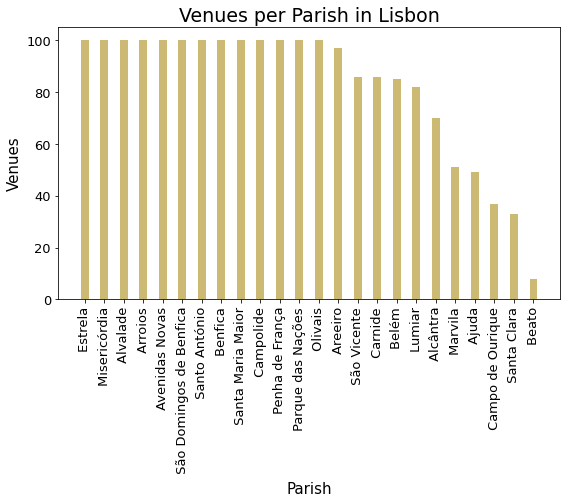

In [44]:
parish=dfm2['Parish']
venues=dfm2['Venue']

sns.reset_orig()
plt.figure(figsize=(9, 5))
plt.title('Venues per Parish in Lisbon',fontsize=19)
plt.ylabel('Venues', fontsize=15)
plt.xlabel('Parish',fontsize=15)
plt.bar(parish,venues,width=0.4,color='y')
plt.xticks(rotation = 90,fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('venues_parish.pdf',bbox_inches='tight')

We also draw a correlation plot between the number of Venues and the number of Collectivities per Parish:

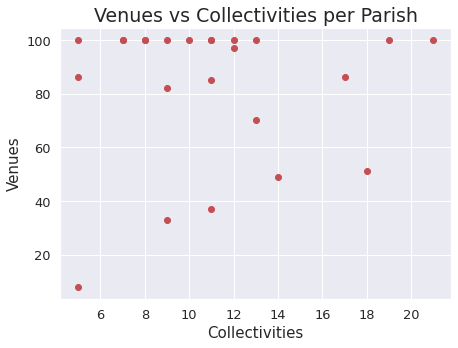

In [45]:
sns.set(rc={'figure.figsize':(7,5)})

collec=dfm2['Count']
venues=dfm2['Venue']
plt.scatter(collec,venues,color='r')
plt.title('Venues vs Collectivities per Parish',fontsize=19)
plt.xlabel('Collectivities', fontsize=15)
plt.ylabel('Venues',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('venues_coll.pdf',bbox_inches='tight')

In [46]:
pearson_coef,p_value=stats.pearsonr(dfm2['Count'],dfm2['Venue'])
print('Pearson Coefficient:',pearson_coef)
print('Pearson p-value:',p_value)

Pearson Coefficient: 0.0668791108011833
Pearson p-value: 0.7561833805675705


And finally a correlation plot between the Venues and the Population in each Parish:

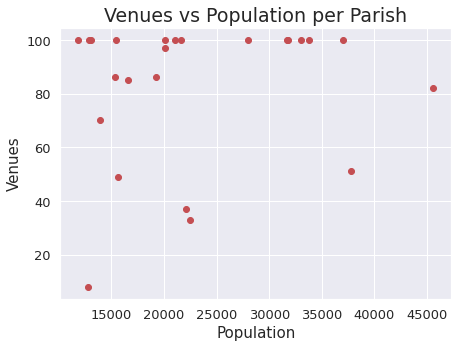

In [47]:
sns.set(rc={'figure.figsize':(7,5)})

pop=dfm2['Population 2013']
venues=dfm2['Venue']
plt.scatter(pop,venues,color='r')
plt.title('Venues vs Population per Parish',fontsize=19)
plt.xlabel('Population', fontsize=15)
plt.ylabel('Venues',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('venues_pop.pdf')

In [48]:
pearson_coef,p_value=stats.pearsonr(dfm2['Population 2013'],dfm2['Venue'])
print('Pearson Coefficient:',pearson_coef)
print('Pearson p-value:',p_value)

Pearson Coefficient: 0.1410972064031369
Pearson p-value: 0.5107731892610132


We repeat the procedure for a radius of 500 from every Parish Council. The motivation for this step is related to the fact that Foursquare API only allows for the extraction of 100 venues within a defined radius. As we observe in the plot *Venues per Parish in Lisbon* above, this value is saturated for many parishes, and therefore we do not have an absolute counting of the number of venues in each parish. By defining a smaller radius, and assuming that parish councils are located at the center of life of the corresponding parish, the resulting number of venues may be regarded as a density.  

In [49]:
# dfvl: dataframe venues large radius
dfvl=pd.read_csv('lisbonvenuesr500.csv')
# dfvl: dataframe venues large radius counts
dfvlc=dfvl.drop(['Unnamed: 0','Parish Latitude','Parish Longitude','Venue Latitude','Venue Longitude',\
                    'Venue Category'],axis=1,inplace=False).groupby('Parish').count()
dfvlc.reset_index(drop=False,inplace=True)
# dfm3: dataframe merging 3
dfm3=pd.merge(left=dfvlc, right=dfm, left_on='Parish', right_on='Parish')
dfm3.sort_values(['Venue'], ascending = False,inplace=True)
dfm3

,Parish,Venue,Count,Number,Population 2013,Area km^2,Lat,Long,Pop Density
21,Santo António,100,12,22,11836,1.49,38° 43' 19.15'',9° 9' 12.39'',7943.624161
3,Areeiro,100,12,4,20131,1.74,38° 44' 42.43'',9° 8' 33.55'',11569.540230
20,Santa Maria Maior,100,21,21,12822,3.01,38° 42' 41.10'',9° 8' 16.83'',4259.800664
4,Arroios,85,19,5,31653,2.13,38° 43' 15.63'',9° 8' 4.77'',14860.563380
15,Misericórdia,72,11,16,13044,2.19,38° 42' 40.12'',9° 9' 4.85'',5956.164384
1,Alcântra,66,13,2,13943,5.07,38° 42' 17.44'',9° 10' 47.56'',2750.098619
7,Belém,65,11,8,16528,10.43,38°41' 53.47'',9° 12' 24.34'',1584.659636
23,São Vicente,62,17,24,15339,1.99,38° 43' 11.55'',9° 7' 54.66'',7708.040201
9,Campo de Ourique,50,11,10,22120,1.65,38° 42'55.76'',9° 10' 8.16'',13406.060606
18,Penha de França,49,8,19,27967,2.71,38° 43' 48.62'',9° 7' 51.14'',10319.926199


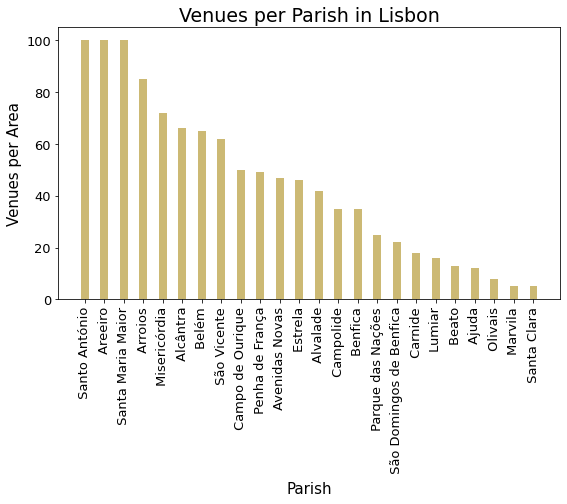

In [50]:
parish=dfm3['Parish']
venues=dfm3['Venue']

sns.reset_orig()
plt.figure(figsize=(9, 5))
plt.title('Venues per Parish in Lisbon',fontsize=19)
plt.ylabel('Venues per Area', fontsize=15)
plt.xlabel('Parish',fontsize=15)
plt.bar(parish,venues,width=0.4,color='y')
plt.xticks(rotation = 90,fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('venuesdens_parish.pdf',bbox_inches='tight')

Plotting the correlation between the Venues and the number of Collectivities in each Parish, for a radius of 500 m.

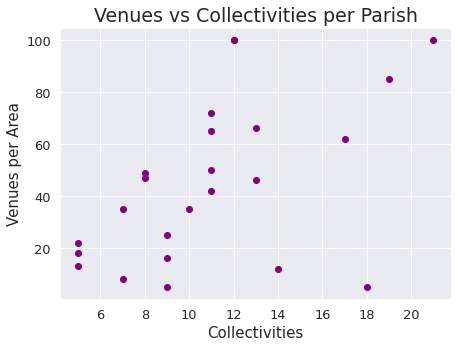

In [51]:
sns.set(rc={'figure.figsize':(7,5)})
#sns.regplot(x='Count',y='Venue',data=dfm3,color='k')

coll=dfm3['Count']
venues=dfm3['Venue']
plt.scatter(coll,venues,color='purple')
plt.title('Venues vs Collectivities per Parish',fontsize=19)
plt.xlabel('Collectivities', fontsize=15)
plt.ylabel('Venues per Area',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('venuesdens_coll.pdf',bbox_inches='tight')

In [52]:
pearson_coef,p_value=stats.pearsonr(dfm3['Count'],dfm3['Venue'])
print('Pearson Coefficient:',pearson_coef)
print('Pearson p-value:',p_value)

Pearson Coefficient: 0.5142834483740374
Pearson p-value: 0.010139393232401359


At last, the correlation between the Venues and the number of Inhabitants in each Parish, for a radius of 500 m.

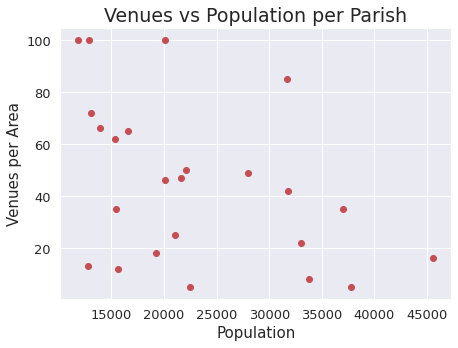

In [53]:
sns.set(rc={'figure.figsize':(7,5)})

pop=dfm3['Population 2013']
venues=dfm3['Venue']
plt.scatter(pop,venues,color='r')
plt.title('Venues vs Population per Parish',fontsize=19)
plt.xlabel('Population', fontsize=15)
plt.ylabel('Venues per Area',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('venuesdens_pop.pdf',bbox_inches='tight')

In [54]:
pearson_coef,p_value=stats.pearsonr(dfm3['Population 2013'],dfm3['Venue'])
print('Pearson Coefficient:',pearson_coef)
print('Pearson p-value:',p_value)

Pearson Coefficient: -0.43272576398948465
Pearson p-value: 0.03468397753089198


Exptrapolation of the number of venues, within a radius of 500 m, to the total area of each parish:

In [56]:
import math

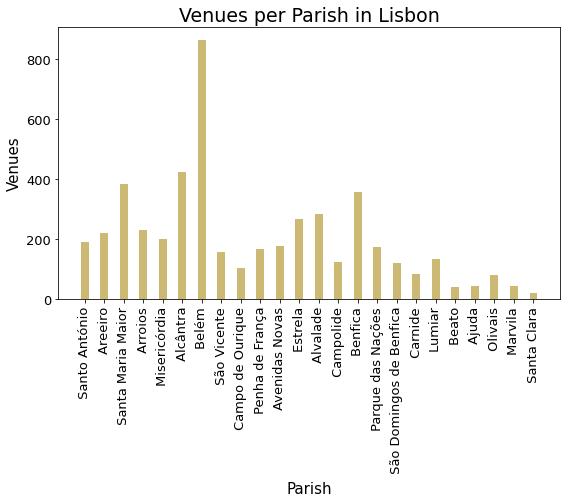

In [57]:
parish=dfm3['Parish']
venues=dfm3['Venue']/(math.pi*0.5**2)*dfm3['Area km^2']

sns.reset_orig()
plt.figure(figsize=(9, 5))
plt.title('Venues per Parish in Lisbon',fontsize=19)
plt.ylabel('Venues', fontsize=15)
plt.xlabel('Parish',fontsize=15)
plt.bar(parish,venues,width=0.4,color='y')
plt.xticks(rotation = 90,fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('venuese_parish.pdf',bbox_inches='tight')

In [58]:
dfm3=dfm3.sort_values(['Pop Density'],ascending=False)
dfm3.head()

,Parish,Venue,Count,Number,Population 2013,Area km^2,Lat,Long,Pop Density
4,Arroios,85,19,5,31653,2.13,38° 43' 15.63'',9° 8' 4.77'',14860.563380
9,Campo de Ourique,50,11,10,22120,1.65,38° 42'55.76'',9° 10' 8.16'',13406.060606
3,Areeiro,100,12,4,20131,1.74,38° 44' 42.43'',9° 8' 33.55'',11569.540230
18,Penha de França,49,8,19,27967,2.71,38° 43' 48.62'',9° 7' 51.14'',10319.926199
21,Santo António,100,12,22,11836,1.49,38° 43' 19.15'',9° 9' 12.39'',7943.624161


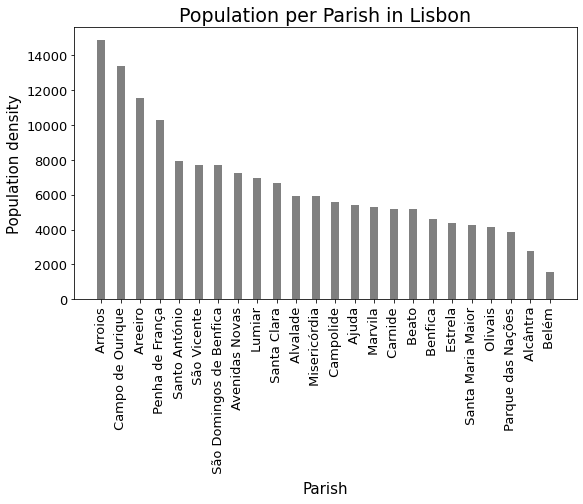

In [59]:
parish=dfm3['Parish']
popd=dfm3['Pop Density']

plt.figure(figsize=(9, 5))
plt.title('Population per Parish in Lisbon',fontsize=19)
plt.ylabel('Population density', fontsize=15)
plt.xlabel('Parish',fontsize=15)
plt.bar(parish,popd,width=0.4,color='gray')
plt.xticks(rotation = 90,fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('popd_parish.pdf',bbox_inches='tight')

This result is in contradition with the plot above, corresponding to the extraction of venues with variable radius.

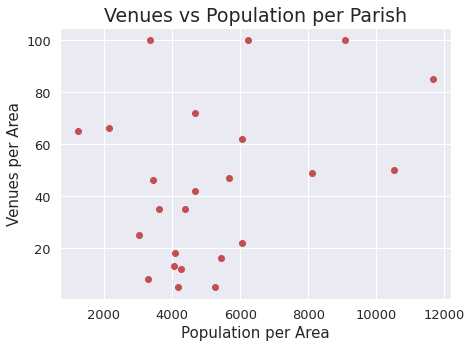

In [60]:
sns.set(rc={'figure.figsize':(7,5)})

pop=dfm3['Pop Density']*math.pi*0.5**2
venues=dfm3['Venue']
plt.scatter(pop,venues,color='r')
plt.title('Venues vs Population per Parish',fontsize=19)
plt.xlabel('Population per Area', fontsize=15)
plt.ylabel('Venues per Area',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('venuesa_popa.pdf',bbox_inches='tight')

In [61]:
pearson_coef,p_value=stats.pearsonr(pop,venues)
print('Pearson Coefficient:',pearson_coef)
print('Pearson p-value:',p_value)

Pearson Coefficient: 0.32092184074371766
Pearson p-value: 0.12625639135062583


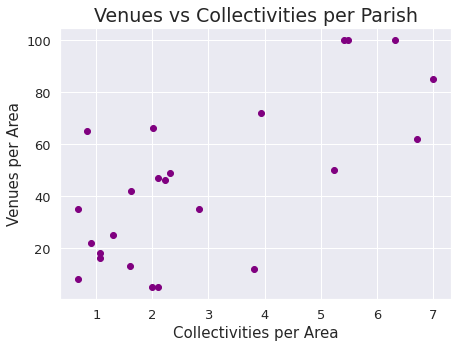

In [62]:
sns.set(rc={'figure.figsize':(7,5)})
#sns.regplot(x='Count',y='Venue',data=dfm3,color='k')

coll=dfm3['Count']/dfm3['Area km^2']*math.pi*0.5**2
venues=dfm3['Venue']
plt.scatter(coll,venues,color='purple')
plt.title('Venues vs Collectivities per Parish',fontsize=19)
plt.xlabel('Collectivities per Area', fontsize=15)
plt.ylabel('Venues per Area',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('venuesa_colla.pdf',bbox_inches='tight')

In [63]:
pearson_coef,p_value=stats.pearsonr(coll,venues)
print('Pearson Coefficient:',pearson_coef)
print('Pearson p-value:',p_value)

Pearson Coefficient: 0.7104679323160018
Pearson p-value: 0.00010019415957184572


A verification of the larger and smaller Parishes in area:

In [64]:
dfpsp=dfp.sort_values(['Area km^2'],ascending=False)
dfpsp.head(7)

,Number,Parish,Population 2013,Area km^2,Latitude,Longitude
7,8,Belém,16528,10.43,38.6982,-9.20676
16,17,Olivais,33788,8.09,38.7736,-9.11706
8,9,Benfica,36985,8.03,38.7484,-9.19963
14,15,Marvila,37793,7.12,38.7469,-9.11036
13,14,Lumiar,45605,6.57,38.7677,-9.16018
17,18,Parque das Nações,21025,5.44,38.7615,-9.09767
2,3,Alvalade,31813,5.34,38.7469,-9.14054


In [65]:
dfpsp.tail(7)

,Number,Parish,Population 2013,Area km^2,Latitude,Longitude
6,7,Beato,12737,2.46,38.7259,-9.11234
15,16,Misericórdia,13044,2.19,38.7111,-9.15135
4,5,Arroios,31653,2.13,38.721,-9.13466
23,24,São Vicente,15339,1.99,38.7199,-9.13185
3,4,Areeiro,20131,1.74,38.7451,-9.14265
9,10,Campo de Ourique,22120,1.65,38.7155,-9.16893
21,22,Santo António,11836,1.49,38.722,-9.15344


The discussion of the results is treated in the associated report.

End of Notebook 1.